## **KPMG - Virtual Experience Program**
****
### Task-1 Data Quality Assesment
📑 Objective :


*   Preliminary data exploration and identify ways to improve the quality of Sprocket Central Pty Ltd’s data.
*   The 3 datasets attached from Sprocket Central Pty Ltd:
    *  Customer Demographic
    *  Customer Addresses
    *  Transaction data in the past three months



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Load Dataset :**

In [ ]:
# Specify the path to your Excel file
excel_file = "/content/KPMG_VI_New_raw_data_update_final.xlsx"

# Read the Excel file into a dictionary of data frames, where each key represents a sheet name
dfs = pd.read_excel(excel_file, sheet_name=None)

# Access each data frame by sheet name
for sheet_name, df in dfs.items():
    print(f"Sheet Name: {sheet_name}")
    #print(df)  # Do whatever operations you need with the data frame
    #print("-----------")
    if sheet_name == "Transactions":
      df_tran = df
    elif sheet_name == "CustomerDemographic":
      df_demo = df
    elif sheet_name == "CustomerAddress":
      df_addr = df

Sheet Name: Title Sheet
Sheet Name: Transactions
Sheet Name: NewCustomerList
Sheet Name: CustomerDemographic
Sheet Name: CustomerAddress


## **Customer Demographic**
***
### **1. Exploratory Data Analysis**
**1.1 Checking Data Type and Unique Values**

In [ ]:
df_demo.sample(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
2547,2548,Kristien,Robberts,Female,11,1971-07-30,Chief Design Engineer,NaN,Mass Customer,N,1,No,13.0
3050,3051,Edi,Lugton,Female,81,1973-06-06,NaN,Manufacturing,Affluent Customer,N,ð¾ ð ð ð ð ð ð ð,Yes,7.0
2282,2283,Gaspar,Janaway,Male,44,1954-02-08,Software Consultant,NaN,High Net Worth,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,16.0


In [ ]:
# Checking Shape
df_demo.shape

(4000, 13)

In [ ]:
# Checking Dataset Info
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [ ]:
# Checking unique value of each columns
for col in df_demo.columns:
  print("{} have {} unique values and data type :{}".format(col,df_demo[col].nunique(),df_demo[col].dtypes))
  if df_demo[col].dtypes == 'int64' or df_demo[col].dtypes == 'float' or df_demo[col].dtypes == 'object':
    print("{} values: {}".format(col,df_demo[col].unique()))
    print("-----------") 
    print(" ")

customer_id have 4000 unique values and data type :int64
customer_id values: [   1    2    3 ... 3998 3999 4000]
-----------
 
first_name have 3139 unique values and data type :object
first_name values: ['Laraine' 'Eli' 'Arlin' ... 'Stephie' 'Rusty' 'Sarene']
-----------
 
last_name have 3725 unique values and data type :object
last_name values: ['Medendorp' 'Bockman' 'Dearle' ... 'Halgarth' 'Woolley' 'Oldland']
-----------
 
gender have 6 unique values and data type :object
gender values: ['F' 'Male' 'Female' 'U' 'Femal' 'M']
-----------
 
past_3_years_bike_related_purchases have 100 unique values and data type :int64
past_3_years_bike_related_purchases values: [93 81 61 33 56 35  6 31 97 49 99 58 38 85 91 57 79 76 72 74 43 55 12 37
  5 62 18  3 17 44 59 40 46 64 24 63 98 51 68 22  2 48 87 26 60 47 73 21
 67 16 78 30 94 28 20 11  1 75 41 69 19 80 83 25 54  4 23 65 88 10 77  9
 82 27 53 32 34 71 36 90 95  8 39  7 42 13 45 50 14 89 84 96 70 66  0 15
 86 92 29 52]
-----------
 
DOB have 

In [ ]:
# Total Numerical Column
nums = df_demo.loc[: , (df_demo.dtypes == int)|(df_demo.dtypes == float)].columns.tolist()
print(nums)
print('Counts :',len(nums))

['customer_id', 'past_3_years_bike_related_purchases', 'tenure']
Counts : 3


In [ ]:
# Total Categorical and DateTime Column
cats = df_demo.loc[:, (df_demo.dtypes == object)|(df_demo.dtypes == 'datetime64[ns]')].columns.tolist() 
print(cats)
print('Counts :', len(cats))

['first_name', 'last_name', 'gender', 'DOB', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'default', 'owns_car']
Counts : 10


####   **Observation :**

*   The dataset consists of **4000** records and 26 columns, with **3 numerical** , 9 categorical columns and 1 Datetime columns.
*   Need to convert **DOB** column to age/age_class so that it can be more insightful.
*   **tenure** column should be integer.
*   There are irrevelant column must be drop,**default** column.
*   Inconsistant values in **gender** column.
*   **deceased_indicator** and **owns_car** values column are suggested be Boolean. 
*   In **deceased_indicator** the value 'Y' are not current customers and recomended to deleted these records because we want only live customers.
****
**1.2 Checking Missing Values**




In [ ]:
nan_df = df_demo[df_demo.isna().any(axis=1)]
nan_percent = len(nan_df)/len(df_demo)*100
print('Percentages missing value of dataset :', nan_percent, '%')

Percentages missing value of dataset : 34.25 %


In [ ]:
# Checking Missing value in each column
count = df_demo.isna().sum().sort_values(ascending=False)

# Percentage of missing values
percent = round(df_demo.isna().mean()*100,2).sort_values(ascending=False)

# create dataframe of missing value
df_demo_nan = pd.concat([count,percent], axis=1, keys=['missing value counts', '%'])
df_demo_nan

,missing value counts,%
job_industry_category,656,16.40
job_title,506,12.65
default,302,7.55
last_name,125,3.12
DOB,87,2.17
tenure,87,2.17
customer_id,0,0.00
first_name,0,0.00
gender,0,0.00
past_3_years_bike_related_purchases,0,0.00


 #### **Observation :** There are many missing values in the dataset (more than 10%).job_industry_category and job_title are the columns that contain the most missing values.
 ****
 **1.3. Checking Duplicate Records**

In [ ]:
# Checking Duplicate Data
df_demo.duplicated().any()

False

#### **Observation :** There is no duplicate data.
****
**1.4. Statistical Summary**

In [ ]:
# Numerical
df_demo[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,4000.0,2000.500000,1154.844867,1.0,1000.75,2000.5,3000.25,4000.0
past_3_years_bike_related_purchases,4000.0,48.890000,28.715005,0.0,24.00,48.0,73.00,99.0
tenure,3913.0,10.657041,5.660146,1.0,6.00,11.0,15.00,22.0


In [ ]:
# Categorical
df_demo[cats].describe().T

,count,unique,top,freq,first,last
first_name,4000,3139,Max,5,NaT,NaT
last_name,3875,3725,Pristnor,3,NaT,NaT
gender,4000,6,Female,2037,NaT,NaT
DOB,3913,3448,1978-01-30 00:00:00,7,1843-12-21,2002-03-11
job_title,3494,195,Business Systems Development Analyst,45,NaT,NaT
job_industry_category,3344,9,Manufacturing,799,NaT,NaT
wealth_segment,4000,3,Mass Customer,2000,NaT,NaT
deceased_indicator,4000,2,N,3998,NaT,NaT
default,3698.0,90.0,100.0,113.0,NaT,NaT
owns_car,4000,2,Yes,2024,NaT,NaT


**1.5 Checking Distribution**

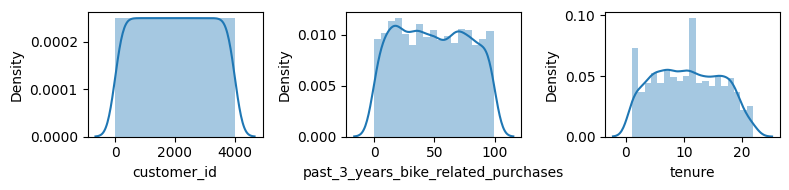

In [ ]:
# Numerical distribution
plt.figure(figsize=(8,2))
for i in range(0,len(nums)):
  plt.subplot(1, len(nums),i+1)
  sns.distplot(df_demo[nums[i]])
  plt.tight_layout()

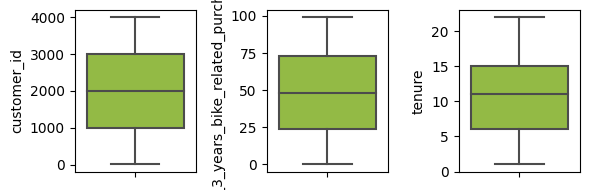

In [ ]:
# Distribution of numerical data and check outlier
plt.figure(figsize=(6,2))
for i in range(0,len(nums)):
  plt.subplot(1,len(nums),i+1)
  sns.boxplot(y=df_demo[nums[i]],color='yellowgreen', orient='v')
  plt.tight_layout()

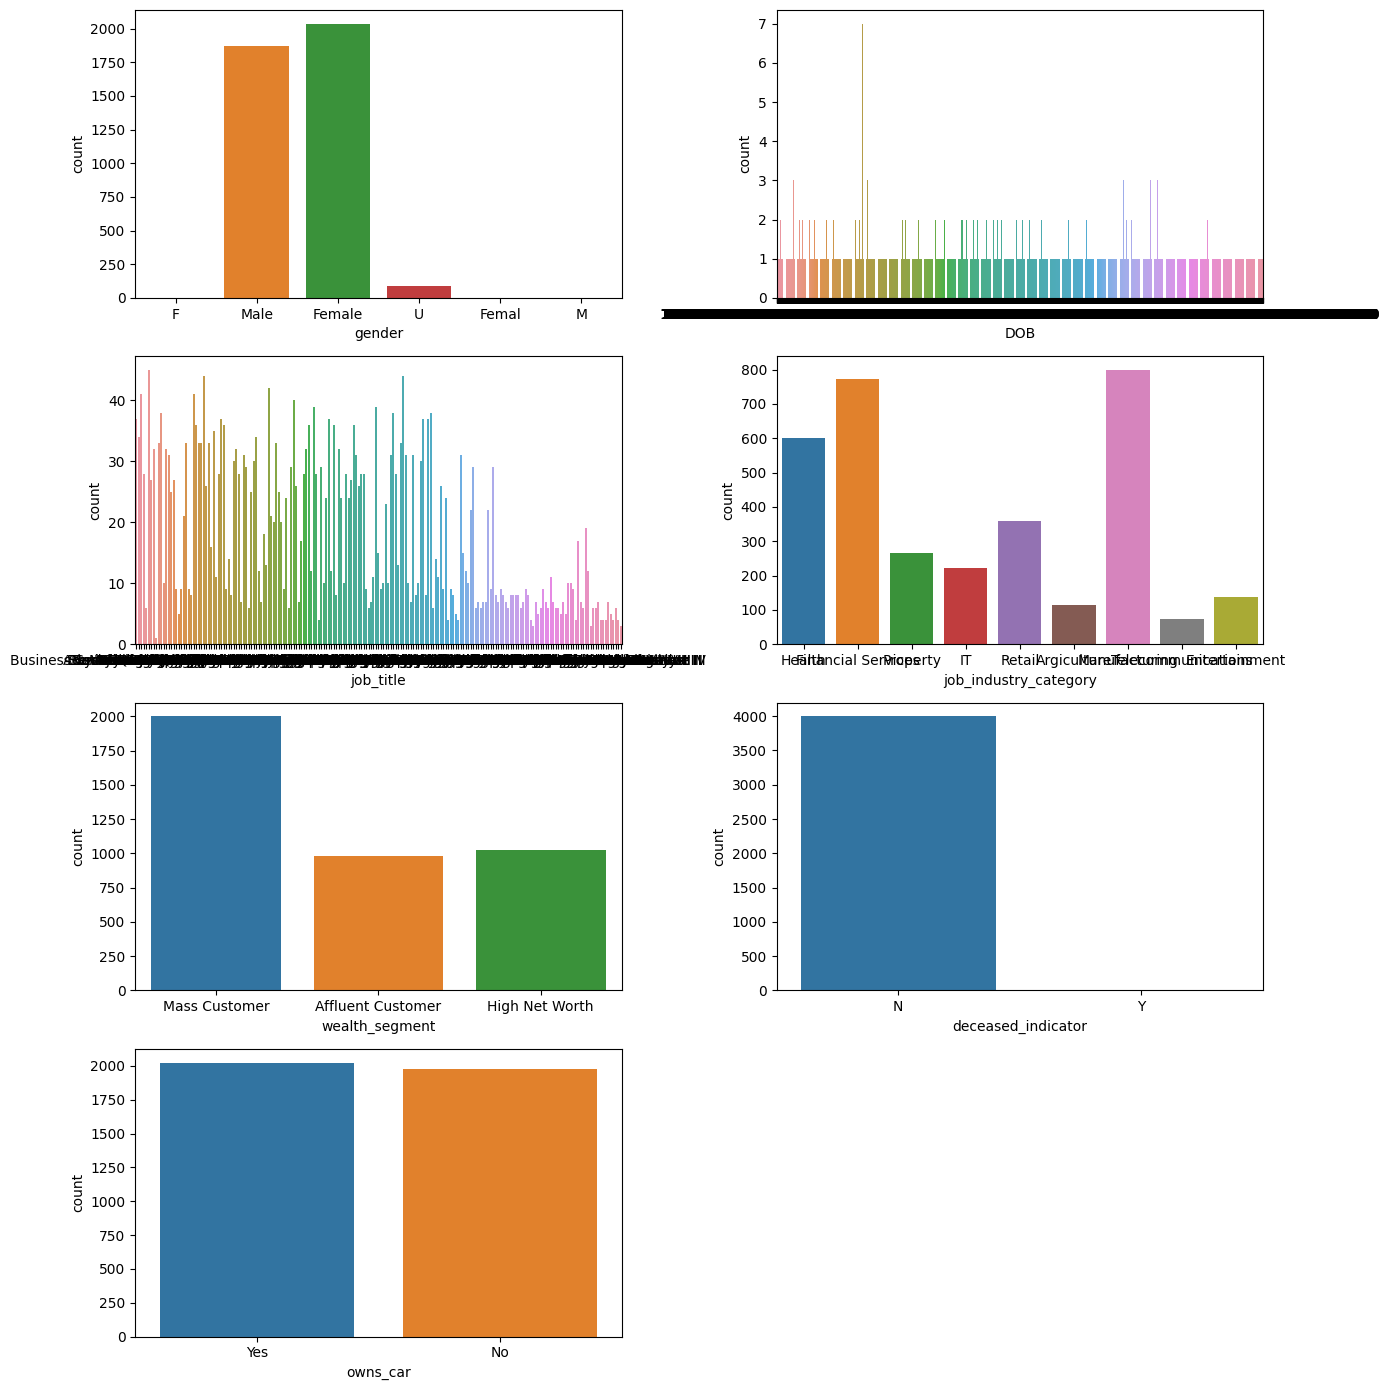

In [ ]:
# Visualization of categorical Data
cats = ['gender','DOB','job_title','job_industry_category','wealth_segment','deceased_indicator','owns_car']
plt.figure(figsize=(14, 14))
for i in range(0, len(cats)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df_demo[cats[i]])
    #plt.xticks(rotation='vertical')
    plt.tight_layout()

**Observation :**
* The data distribution tends to be normal.
* There are no outlier/ anomaly record.
****
### **2. Data Cleaning**
**2.1 Dropping Irrelavant Columns**

In [ ]:
# creat a copy of dataset
df_demo1 = df_demo.copy()

In [ ]:
# Drop irrevalent Column(from 1.1)
df_demo1.drop(columns=['default'],inplace=True)
df_demo1.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

The dataset has been cleared of irrelevant columns ✅
****
**2.2 Handling Missing Values**

In [ ]:
df_demo1.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

🔽 **first_name and last_name** last_name 125 Null value

It is assumed that the user did not fill in or does not have a last name, so I decided to **fill the NaN last name value with the first name.**

In [ ]:
# Fill nan in last_name with first_name
df_demo1['last_name'].fillna(df_demo1['first_name'],inplace=True)

In [ ]:
df_demo1['last_name'].isnull().sum()

0

🔽 **job_title and job_industry_category** - 506 and 656 Null value

Because the number of missing values in this column is quite **large (500+)** and considering the frequency of **unique values**, I decided to **fill NaN with previous value.**

In [ ]:
df_demo1['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [ ]:
df_demo1['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [ ]:
# filling nan with previous value
fill = ['job_title','job_industry_category']

for x in fill:
  df_demo1[x].fillna(method='pad',inplace=True)
  print(x,df_demo1[x].isnull().sum())

job_title 0
job_industry_category 0


🔽 **DOB** - 87 Null value

frequency of missing values more large than mode, so I decided to fill NaN with previous value.

In [ ]:
df_demo1['DOB'].fillna(method='pad',inplace=True)
print('DOB',df_demo1['DOB'].isnull().sum())

DOB 0


🔽 **tenure**  87 Null value

In [ ]:
df_demo1['tenure'].fillna(method='pad',inplace=True)
print('tenure',df_demo1['tenure'].isnull().sum())

tenure 0


The dataset has been cleared of missing values ✅
****
**2.3 Handling Data Type & Incorrect Values**

🔽 **gender**

In [ ]:
# Checking value counts 
df_demo1['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [ ]:
# fixing inconsistance value
df_demo1.replace(to_replace=['F','U','Femal'],value='Female',inplace=True)
df_demo1.replace(to_replace=['M'],value='Male',inplace=True)

In [ ]:
df_demo1['gender'].value_counts()

Female    2127
Male      1873
Name: gender, dtype: int64

🔽 **deceased_indicator**

In [ ]:
df_demo1['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [ ]:
df_demo1['deceased_indicator'].replace(['Y','N'],['Yes','No'],inplace=True)

In [ ]:
df_demo1[df_demo1['deceased_indicator'] == "Yes"]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
752,753,Josy,St. Quentin,Female,82,1970-03-07,Food Chemist,Health,Affluent Customer,Yes,Yes,6.0
3789,3790,Kurtis,Morson,Male,91,1959-05-31,Senior Editor,Retail,Mass Customer,Yes,Yes,9.0


In [ ]:
# drop colums
df_demo1.drop(columns='deceased_indicator', inplace=True)

🔽 **DOB**  (Change the DOB to age)

In [ ]:
df_demo1['DOB'].value_counts()

1978-01-30    7
1956-08-08    5
1987-06-16    4
1985-10-21    4
1978-08-19    4
             ..
1972-08-14    1
1962-05-14    1
2000-01-25    1
1976-08-05    1
1991-11-05    1
Name: DOB, Length: 3448, dtype: int64

In [ ]:
# Create function to calculate age
from datetime import date
def calculate_age(birthdate):
  today = date.today()
  age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
  return age

In [ ]:
# fit into dataframe
df_demo1['age'] = df_demo1['DOB'].apply(calculate_age)
df_demo1['age_class'] = (round(df_demo1['age']/10)*10).astype(int)
df_demo1.drop(columns='age',inplace=True)

In [ ]:
df_demo1['age_class'].value_counts()

40     1128
50      951
60      785
30      619
20      275
70      235
80        4
90        2
180       1
Name: age_class, dtype: int64

🔽 **tenure**

In [ ]:
df_demo1['tenure'] = df_demo1['tenure'].astype('int64')

### **3. Save Clean Dataset**

In [ ]:
df_demo1.sample(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age_class
2357,2358,Ave,Peatt,Male,26,1959-05-01,Senior Sales Associate,Retail,High Net Worth,Yes,15,60
3197,3198,Dur,Knappen,Male,66,1997-08-02,Media Manager III,Manufacturing,Mass Customer,Yes,1,20
136,137,Vaughn,Artin,Male,27,1987-11-21,Office Assistant II,Property,High Net Worth,No,10,40


In [ ]:
df_demo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            4000 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  4000 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   owns_car                             4000 non-null   object        
 10  tenure      

In [ ]:
#df_demo1.to_csv('CustomerDemographic_CLEAN.csv', index=False)

## **Customer Address**
***
### **1. Exploratory Data Analysis**
**1.1. Checking Data Type and Unique Values**

In [ ]:
df_addr.sample(3)

,customer_id,address,postcode,state,country,property_valuation
1593,1598,4 Florence Street,2032,NSW,Australia,11
880,885,5 Hauk Way,4870,QLD,Australia,8
1616,1621,48 Melby Trail,2131,NSW,Australia,8


In [ ]:
# Checking shape
df_addr.shape

(3999, 6)

In [ ]:
df_addr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [ ]:
# Checking unique value of each columns
for col in df_addr.columns:
  print("{} have {} unique values: {}".format(col, df_addr[col].nunique(), df_addr[col].dtypes))
  if df_addr[col].dtypes == 'int64' or df_addr[col].dtypes == 'object':
    print("{} values: {}".format(col,df_addr[col].unique()))
    print('')

customer_id have 3999 unique values: int64
customer_id values: [   1    2    4 ... 4001 4002 4003]

address have 3996 unique values: object
address values: ['060 Morning Avenue' '6 Meadow Vale Court' '0 Holy Cross Court' ...
 '87 Crescent Oaks Alley' '8194 Lien Street' '320 Acker Drive']

postcode have 873 unique values: int64
postcode values: [2016 2153 4211 2448 3216 2210 2650 2023 3044 4557 3799 2760 2428 3331
 3058 2135 2233 2444 4413 4740 3218 4868 4116 2519 2756 2170 4005 4127
 2535 4726 4805 2212 2207 3350 3931 4018 4670 2480 3212 2322 3198 2047
 4503 2145 4350 2142 2029 2127 4280 2166 2046 2026 2765 2749 2745 3752
 2217 2230 3046 3183 2070 2213 4208 2774 4133 4213 4170 2073 3561 2330
 3977 2204 2086 2226 2075 2038 2069 2100 3133 3070 2777 2125 2766 2209
 2160 2065 2150 2168 4171 2155 2517 2096 2750 2093 3204 4300 3844 4226
 3192 2485 2097 4817 2516 3074 4508 4405 2452 2205 4132 4744 2158 3201
 4178 2112 2033 4401 3186 4017 2315 2285 2219 4509 2759 2747 2227 2025
 3191 3025 2263

In [ ]:
# Numerical Data
nums_a = df_addr.loc[:,(df_addr.dtypes == 'int64')].columns.tolist()
print(nums_a)
print('Counts:',len(nums_a))

['customer_id', 'postcode', 'property_valuation']
Counts: 3


In [ ]:
# Categorical Data
cats_a = df_addr.loc[:,(df_addr.dtypes == object)].columns.tolist()
print(cats_a)
print('Counts:',len(cats_a))

['address', 'state', 'country']
Counts: 3


**Observation :**

*   The Datasets contain **3999 data** having **6** columns,with **3 Numerical** and **3 Categorical** columns.
*   The Data type in each column is appropiate.
*   There are inconsistent value in the **state column** ,so it need to be treated.
****
**1.2 Checking Missing Values**

In [ ]:
# Percentage of missing value of dataset
nan_df = df_addr[df_addr.isna().any(axis=1)]
nan_percent = round(len(nan_df)/len(df_addr)*100,2)
print('Percentages missing value of dataset :', nan_percent, '%')

Percentages missing value of dataset : 0.0 %


**Observation :** There is **no missing values.**
****
**1.3 Checking Duplicate Records**

In [ ]:
# Checking duplicated data
df_addr.duplicated().sum()

0

**Observation :** There is **no duplicate data.**
****
**1.4. Statistical Summary**

In [ ]:
# Numerical
df_addr[nums_a].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,3999.0,2003.987997,1154.576912,1.0,1004.5,2004.0,3003.5,4003.0
postcode,3999.0,2985.755939,844.878364,2000.0,2200.0,2768.0,3750.0,4883.0
property_valuation,3999.0,7.514379,2.824663,1.0,6.0,8.0,10.0,12.0


In [ ]:
# Categorical
df_addr[cats_a].describe().T

,count,unique,top,freq
address,3999,3996,3 Mariners Cove Terrace,2
state,3999,5,NSW,2054
country,3999,1,Australia,3999


**1.5 Checking Distribution**

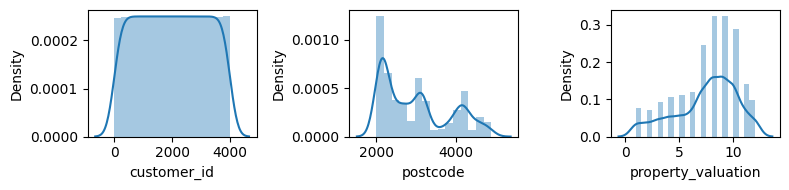

In [ ]:
# Distribution on numerical data
plt.figure(figsize=(8,2))
for i in range(0,len(nums_a)):
  plt.subplot(1,len(nums_a),i+1)
  sns.distplot(df_addr[nums_a[i]])
  plt.tight_layout()

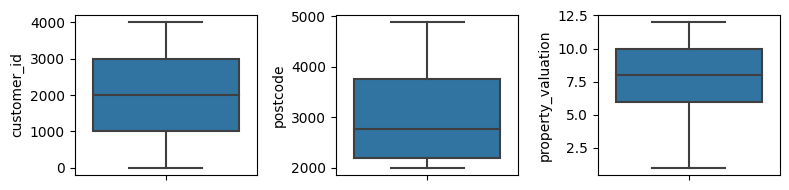

In [ ]:
# Distribution numerical data and check outlier
plt.figure(figsize=(8,2))
for i in range(0,len(nums_a)):
  plt.subplot(1,len(nums_a),i+1)
  sns.boxplot(y=df_addr[nums_a[i]])
  plt.tight_layout()

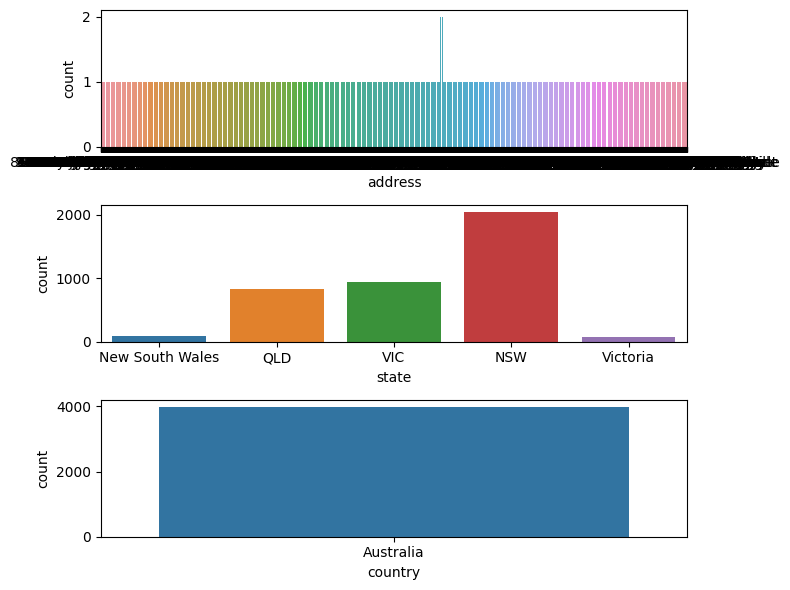

In [ ]:
# Distribution of categorical
plt.figure(figsize=(8,6))
for i in range(0,len(cats_a)):
  plt.subplot(3,1,i+1)
  sns.countplot(x=df_addr[cats_a[i]])
  plt.tight_layout()

**Observation :**
*  property_valuation: negtively skewed.
*  There are no outlier.
****
### **2. Data Cleaning**
**2.1. Handling Incorrect Values**

In [ ]:
df_addr1 = df_addr.copy()

🔽 **state**

There are inconsistentcy values in columns state. So I have replace 'New South Wales' to 'NSW' and 'Victoria' to 'VIC'.

In [ ]:
df_addr1['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [ ]:
# Replace values
df_addr1['state'].replace(['New South Wales','Victoria'],['NSW','VIC'],inplace=True)

In [ ]:
df_addr1['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

✅ The value has been corrected.
****
### **3. Save Clean Dataset**

In [ ]:
df_addr1.sample(3)

,customer_id,address,postcode,state,country,property_valuation
3107,3112,944 Becker Road,3162,VIC,Australia,11
2294,2299,531 Springview Lane,3101,VIC,Australia,10
2093,2098,794 Kennedy Court,4740,QLD,Australia,2


In [ ]:
#df_addr1.to_csv('CustomerAddress_CLEAN.csv', index=False)

## **Transaction**
****
### **1. Exploratory Data Analysis**
**1.1 Checking Data Type and Unique Values**

In [ ]:
df_tran.sample(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
7400,7401,23,104,2017-10-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,40670.0
9332,9333,51,1450,2017-01-19,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,41009.0
19338,19339,38,2787,2017-04-05,0.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,36498.0


In [ ]:
df_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
# Checking Shape
df_tran.shape

(20000, 13)

In [ ]:
# Checking Unique value for each column
for col in df_tran.columns:
  print("{} have {} unique values: {}".format(col,df_tran[col].nunique(),df_tran[col].dtypes))
  if df_tran[col].dtypes == 'int64' or df_tran[col].dtypes == 'float' or df_tran[col].dtypes == 'object' or df_tran[col].dtypes == 'datetime64[ns]':
    print("{} values: {}".format(col,df_tran[col].unique()))
    print(" ")

transaction_id have 20000 unique values: int64
transaction_id values: [    1     2     3 ... 19998 19999 20000]
 
product_id have 101 unique values: int64
product_id values: [  2   3  37  88  78  25  22  15  67  12   5  61  35  16  79  33  54  27
  82  89  64  19  72  91   1  99   0  92  14  44  76  46  55  66  81  86
  32  77  96   6  47  94  93  60  28   4  38  56  58  50  80  87  84  21
  31  62  17  73  45  49  95  18  70  26  39  36  98  75  42  20  24  53
  65  29  11  10   7  41   9  69  90  97 100  74  71  34  57  23  51  59
  63  40   8  13  30  48  68  83  43  52  85]
 
customer_id have 3494 unique values: int64
customer_id values: [2950 3120  402 ...  130 2789 3446]
 
transaction_date have 364 unique values: datetime64[ns]
transaction_date values: ['2017-02-25T00:00:00.000000000' '2017-05-21T00:00:00.000000000'
 '2017-10-16T00:00:00.000000000' '2017-08-31T00:00:00.000000000'
 '2017-10-01T00:00:00.000000000' '2017-03-08T00:00:00.000000000'
 '2017-04-21T00:00:00.000000000' '20

In [ ]:
# numerical data
nums_t = df_tran.loc[:,(df_tran.dtypes == 'int64') | (df_tran.dtypes == float)].columns.tolist()
print(nums_t)
print('Counts :', len(nums_t))

['transaction_id', 'product_id', 'customer_id', 'online_order', 'list_price', 'standard_cost', 'product_first_sold_date']
Counts : 7


In [ ]:
# Categorical Data
cats_t = df_tran.loc[:, (df_tran.dtypes == object) | (df_tran.dtypes == 'datetime64[ns]')].columns.tolist() 
print(cats_t)
print('Counts :', len(cats_t))

['transaction_date', 'order_status', 'brand', 'product_line', 'product_class', 'product_size']
Counts : 6


**Observation :**
*  The dataset consist of **20000 records** and **13** column with **7 numerical ,5 categorical ,1 datetime column.**
*  **transaction_id, product_id, customer_id, product_first_sold_date** is recommended to be **integer.**
*  **standard_cost** is recommended to be **float** and there are inconsistencies in values and unwanted characters, so treatment is needed.
****
**1.2 Checking Missing Values**

In [ ]:
# Checking missing value in each column
counts = df_tran.isna().sum().sort_values(ascending=False)

# Percentage of missing values
percent = round(df_tran.isna().mean()*100,2).sort_values(ascending=False)

# create dataframe of missing value
df_demo_nan = pd.concat([counts,percent],axis=1,keys=['missing value counts', '%'])
df_demo_nan

,missing value counts,%
online_order,360,1.80
brand,197,0.98
product_line,197,0.98
product_class,197,0.98
product_size,197,0.98
standard_cost,197,0.98
product_first_sold_date,197,0.98
transaction_id,0,0.00
product_id,0,0.00
customer_id,0,0.00


In [ ]:
# Null dataframe
nan_df = df_tran[df_tran.isna().any(axis=1)]
nan_percent = round(len(nan_df)/len(df_tran)*100,2)
print('Percentages missing value of dataset :', nan_percent, '%')

Percentages missing value of dataset : 2.77 %


**Observation :** There are a missing values of **less than 10%**. So I decided to drop it, as it is still safe and does not affect the analysis significantly.
****
**1.3 Checking Duplicate Records**

In [ ]:
# Checking duplicated data
df_tran.duplicated().sum()

0

**Observation :** There are no duplicate records.
****
**1.4 Statistical Summary**

In [ ]:
# Numerical value
df_tran[nums_t].describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,20000.0,10000.500000,5773.647028,1.00,5000.75,10000.50,15000.25,20000.00
product_id,20000.0,45.364650,30.753590,0.00,18.00,44.00,72.00,100.00
customer_id,20000.0,1738.246050,1011.951046,1.00,857.75,1736.00,2613.00,5034.00
online_order,19640.0,0.500458,0.500013,0.00,0.00,1.00,1.00,1.00
list_price,20000.0,1107.829449,582.825242,12.01,575.27,1163.89,1635.30,2091.47
standard_cost,19803.0,556.046951,405.955660,7.21,215.14,507.58,795.10,1759.85
product_first_sold_date,19803.0,38199.776549,2875.201110,33259.00,35667.00,38216.00,40672.00,42710.00


In [ ]:
# Categorical value
df_tran[cats_t].describe().T

,count,unique,top,freq,first,last
transaction_date,20000,364,2017-02-14 00:00:00,82,2017-01-01,2017-12-30
order_status,20000,2,Approved,19821,NaT,NaT
brand,19803,6,Solex,4253,NaT,NaT
product_line,19803,4,Standard,14176,NaT,NaT
product_class,19803,3,medium,13826,NaT,NaT
product_size,19803,3,medium,12990,NaT,NaT


**1.5 Checking Distribution**

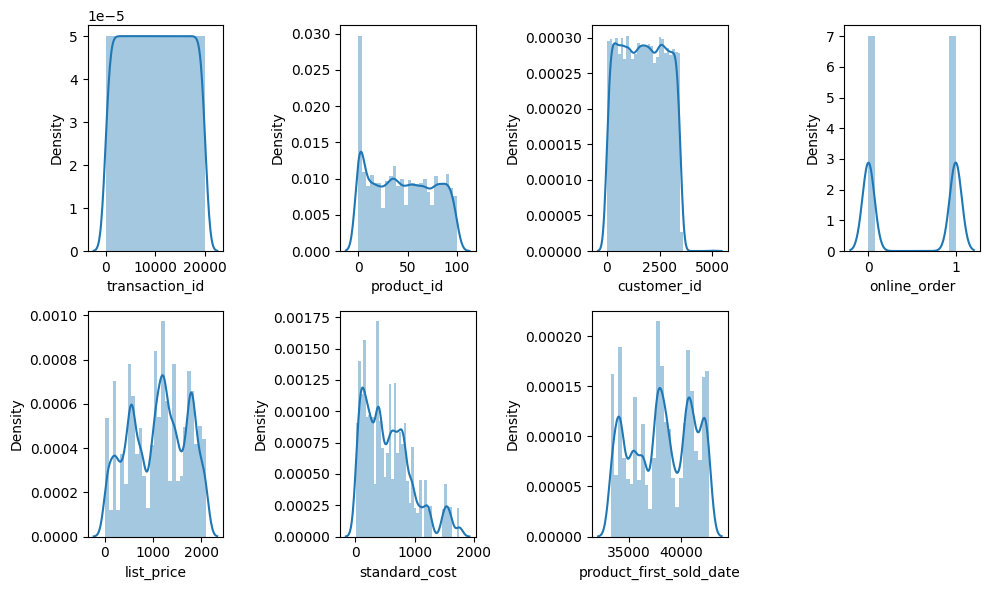

In [ ]:
# Distribution of numerical data
nums_t = ['transaction_id', 'product_id', 'customer_id', 'online_order', 'list_price', 'standard_cost', 'product_first_sold_date']
plt.figure(figsize=(10, 6))

# Adjust the subplot grid to accommodate the 7th subplot
plt.subplot(2, 4, 7)
sns.distplot(df_tran[nums_t[6]])

for i in range(0, len(nums_t)-1):
    plt.subplot(2, 4, i+1)
    sns.distplot(df_tran[nums_t[i]])

plt.tight_layout()
plt.show()

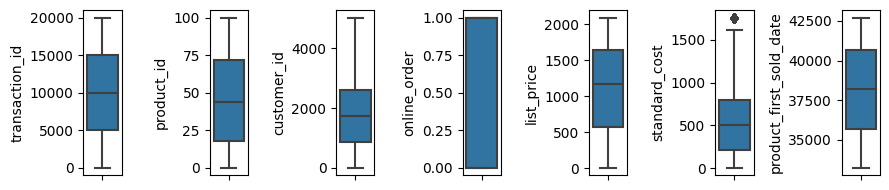

In [ ]:
# Distribution numerical data to check the outlier
plt.figure(figsize=(9,2))
for i in range(0, len(nums_t)):
    plt.subplot(1, len(nums_t), i+1)
    sns.boxplot(y=df_tran[nums_t[i]])
    plt.tight_layout()

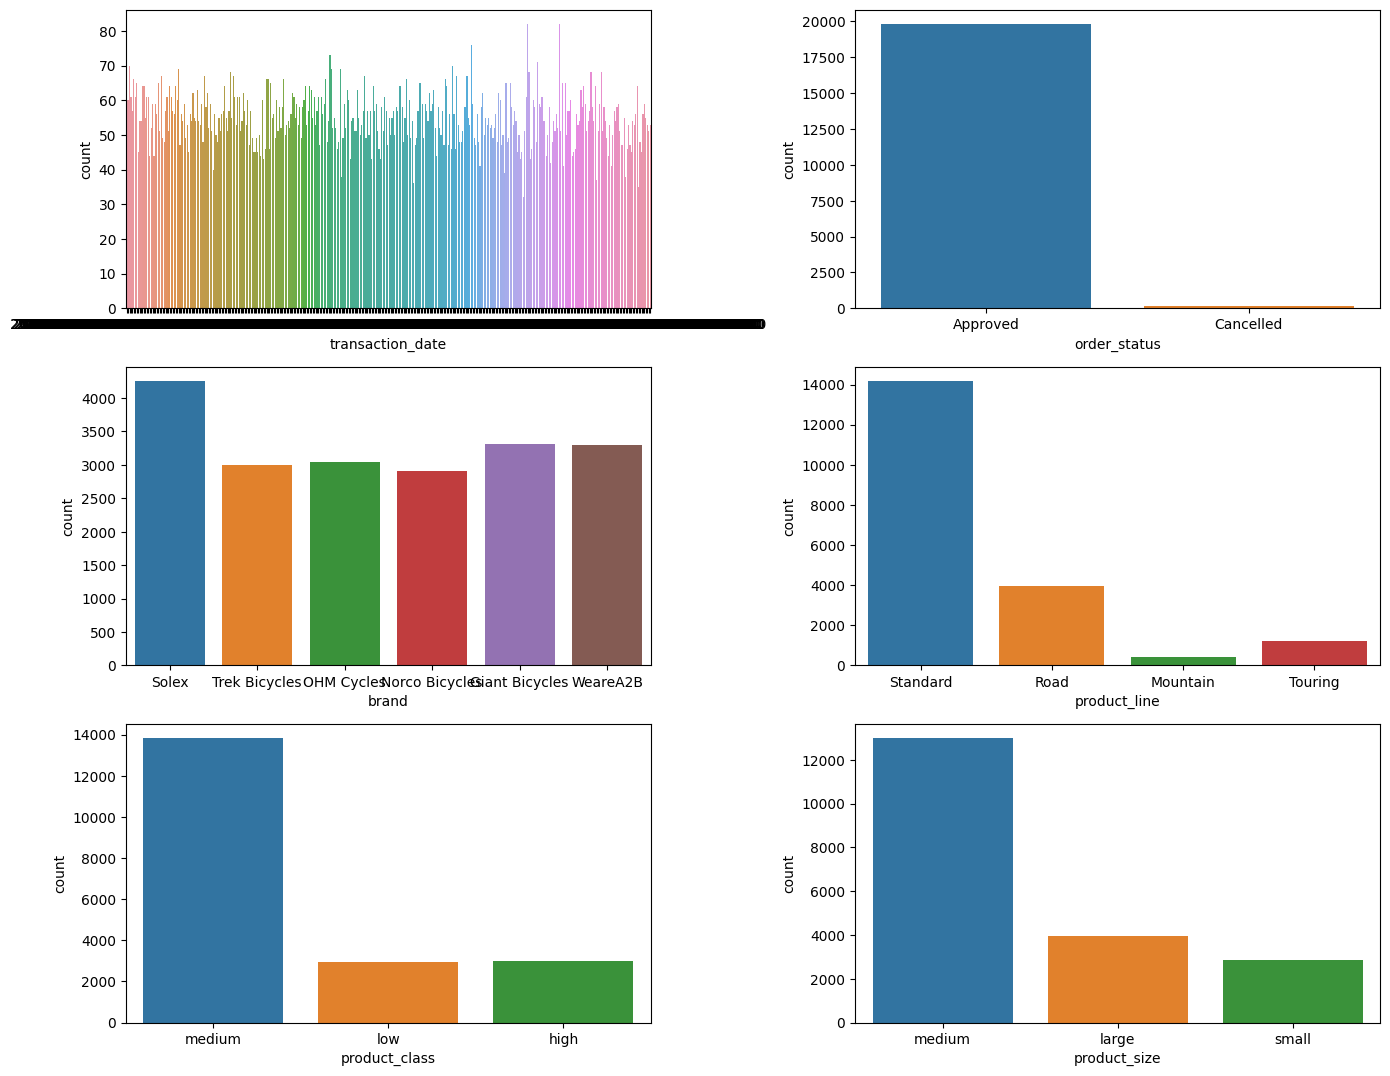

In [ ]:
# Distribution of categorical data
plt.figure(figsize=(14, 14))
for i in range(0, len(cats_t)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df_tran[cats_t[i]])
    plt.tight_layout()

### **2. Data Cleaning**
**2.1 Dropping Irrelevant Columns**

There no irrelevant column found.
****
**2.2 Handling Missing Values**

There less than 10% value likely 2.7% value missing from actual so, if we drop nan value there are no effect on original data.  

In [ ]:
df_tran1 = df_tran.copy()

In [ ]:
df_tran1.dropna(inplace=True)

In [ ]:
df_tran1.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

The dataset has been cleared of missing values ✅
****
**2.3 Handling Data Type & Incorrect Values**

🔽 **online_order ,list_price ,standard_cost ,product_first_sold_date** 

from float to integer

In [ ]:
# Changing the datatype
col_int = ['online_order','list_price','standard_cost','product_first_sold_date']
df_tran1[col_int] = df_tran1[col_int].astype('int64')

In [ ]:
df_tran1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  int64         
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  int64         
 11  standard_cost            19445 non-null  int64         
 12  product_first_sold_date  19445 n

🔽 **product_first_sold_date**

Unix time, also known as POSIX time or epoch time, is a system for representing time as a single integer value. It is a way to track time as the number of seconds that have elapsed since a specific reference point called the Unix epoch.

In [ ]:
df_tran1['product_first_sold_date'].sample(3)

2023    37220
2056    42218
5270    36498
Name: product_first_sold_date, dtype: int64

In [ ]:
# unix time values to Datetime
import datetime as dt

df_tran1['product_first_sold_date'] = pd.TimedeltaIndex(df_tran1['product_first_sold_date'],unit='d') + dt.datetime(1900,1,1)

In [ ]:
df_tran1['product_first_sold_date'].sample(3)

6060    1999-07-28
830     2006-11-12
13814   1993-04-22
Name: product_first_sold_date, dtype: datetime64[ns]

🔽 **order_status**

In the **order_status** column with the Cancelled value, it can be assumed that the **transaction was canceled so the company did not get revenue.** We decide to delete the data record that has the Cancelled value and then we drop the column. The data retrieved is the successful transaction data.

In [ ]:
df_tran1['order_status'].value_counts()

Approved     19273
Cancelled      172
Name: order_status, dtype: int64

In [ ]:
# remove columns order status
df_tran1.drop(columns=['order_status'], inplace=True)

In [ ]:
df_tran1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  int64         
 5   brand                    19445 non-null  object        
 6   product_line             19445 non-null  object        
 7   product_class            19445 non-null  object        
 8   product_size             19445 non-null  object        
 9   list_price               19445 non-null  int64         
 10  standard_cost            19445 non-null  int64         
 11  product_first_sold_date  19445 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(6), 

The dataset has been cleared ✅
****
### **3. Save Clean Dataset**

In [ ]:
df_tran1.sample(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1893,1894,87,2615,2017-11-05,0,Giant Bicycles,Standard,high,medium,1179,707,2000-11-05
3859,3860,33,840,2017-11-22,0,Giant Bicycles,Standard,medium,small,1311,1167,2010-06-09
12701,12702,0,2971,2017-12-03,1,OHM Cycles,Standard,high,medium,227,136,2004-08-19


In [ ]:
df_tran1.to_csv('Transaction_CLEAN.csv', index=False)

Getting transaction data in the past three months.

In [ ]:
df_tran1.sort_values(by='transaction_date', ascending=False).head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
10904,10905,0,2659,2017-12-30,0,Solex,Standard,medium,medium,100,75,2004-01-18
2284,2285,95,3216,2017-12-30,1,Giant Bicycles,Standard,medium,large,569,528,2016-03-31
7517,7518,65,3433,2017-12-30,0,WeareA2B,Standard,medium,medium,1807,778,2015-05-23


In [ ]:
# filtering data in the past three months
df_tran_latest = df_tran1[(df_tran1['transaction_date'] >= '2017-10-01') & (df_tran1['transaction_date'] <= '2017-12-30')]
df_tran_latest.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
2,3,37,402,2017-10-16,0,OHM Cycles,Standard,low,medium,1793,248,1999-07-22
4,5,78,787,2017-10-01,1,Giant Bicycles,Standard,medium,large,1765,709,2015-08-12
15,16,3,2961,2017-10-10,0,Trek Bicycles,Standard,medium,large,2091,388,2003-09-11
20,21,27,1582,2017-10-09,0,Trek Bicycles,Standard,medium,medium,499,388,1999-06-25
23,24,82,515,2017-10-18,0,Giant Bicycles,Road,medium,medium,1538,829,2016-02-06


In [ ]:
# cheking date
df_tran_latest['transaction_date']

2       2017-10-16
4       2017-10-01
15      2017-10-10
20      2017-10-09
23      2017-10-18
           ...    
19984   2017-11-15
19985   2017-11-09
19986   2017-11-01
19993   2017-12-23
19996   2017-11-09
Name: transaction_date, Length: 4938, dtype: datetime64[ns]

In [ ]:
# saving dataset
df_tran_latest.to_csv('Transaction_3months_CLEAN.csv', index=False)

In [ ]:
df_tran_latest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4938 entries, 2 to 19996
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           4938 non-null   int64         
 1   product_id               4938 non-null   int64         
 2   customer_id              4938 non-null   int64         
 3   transaction_date         4938 non-null   datetime64[ns]
 4   online_order             4938 non-null   int64         
 5   brand                    4938 non-null   object        
 6   product_line             4938 non-null   object        
 7   product_class            4938 non-null   object        
 8   product_size             4938 non-null   object        
 9   list_price               4938 non-null   int64         
 10  standard_cost            4938 non-null   int64         
 11  product_first_sold_date  4938 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(6), o